# Klassifizierung mit k-Nearest-Neighbor
Liegt ein Datensatz vor, in dem neben einem oder mehreren kontinuierlichen Eigenschaften (Features) für jedes Beispiel eine Klassenbezeichnung bekannt ist, kann der [k-Nearest-Neighbor Algorithmus](https://de.wikipedia.org/wiki/N%C3%A4chste-Nachbarn-Klassifikation) (kNN) genutzt werden, um neue Beispiele zu klassifizieren.

Dabei wird anhand der Eigensschaften ein ein- oder mehrdimensionaler Vektorraum aufgebaut, und die Beispiele des Datensatzes als Datenpunkte in diesem Raum dargestellt. Kommt ein neuer Datenpunkt hinzu, für den die Klasse bisher unbekannt ist, wird die Klasse der `k` nächsten Nachbarn dieses Datenpunkts betrachtet und für den neuen Punkt übernommen. Es werden die Abstände eines neuen Datenpunktes zu den `k` nähesten Datenpunkten gemessen, um herauszufinden, zu welcher Klasse dieser gehört.

![k-Nearest-Neighbor](https://adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png)

Der hier genutzte Datensatz wurde bereits [1936 an der UCI Berkeley](https://archive.ics.uci.edu/ml/datasets/Iris) entwickelt und ist wohlmöglich der bekannteste Datensatz im Bereich der Mustererkennung: In diesem Beispiel geht es um die Klassifizierung dreier Arten von Schwertlilien (_lat. Iris_). Wie in der Abbildung unten zu erkennen sind diese drei Arten sehr ähnlich. In dem Datensatz befinden sich neben der Information über die Art die Maße der Kelchblätter (Sepale) und Kronblätter (Petale). In diesem Notebook wird überprüft, ob der kNN-Algorithmus genutzt werden kann, um die drei Schwertlilien-Arten anhand ihrer Blütenmaße zu klassifizieren.

![Schwertlilie](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Programmbibliotheken importieren
Auch hier werden alle notwendigen Module importiert.

In [1]:
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

## Datensatz laden
Der Iris-Datensatz wird geladen und die ersten beiden Features (sepal length in cm, sepal width in cm) werden ausgewählt.

In [9]:
# Datensatz von sklearn.datasets laden
iris = datasets.load_iris()

# Die ersten beiden Features auswählen und auf X schreiben
X = iris.data[:, 2:4]

# Klasseinformation auf eine Variable Y schreiben
Y = iris.target

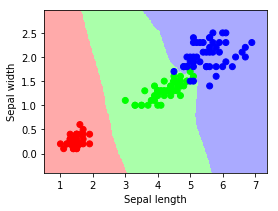

In [10]:
h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Farben für die Darstellung festlegen
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y, cmap=cmap_bold)
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
#pl.xticks(())
#pl.yticks(())

pl.show()

## Weiterführende Fragen

Wofür könnte das k-nearest-neighbor Verfahren sinnvoll genutzt bzw. erweitert werden, wenn die Labels für die Klassifizierung nicht vorliegen? _Stichwort: Unsupervised Learning_

K-nearest-neighbor kann auch für Regressionsprobleme genutzt werden. Wie 